# Exersice1

# Exe1.Question1. Plot Original Microchip Data Point 

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [55]:
data = np.loadtxt('microchips.csv' ,delimiter=',')

In [56]:
data.shape

(118, 3)

In [57]:
X = data[:,[0,1]]
Y = data[:,2]

In [58]:
# Creating plotData method to display the original microchip data
def plotData(x, y, labelOK, labelFail):
    OK = Y==1
    Fail = Y==0

    plt.scatter(x[OK, 0], x[OK, 1], s=30, c='darkblue', marker='+', label=labelOK)
    plt.scatter(x[Fail, 0], x[Fail, 1], s=30, c='yellow', marker='o', edgecolors='y', label=labelFail)
    plt.legend(loc='upper right', frameon=True)
    plt.title('Original Data')

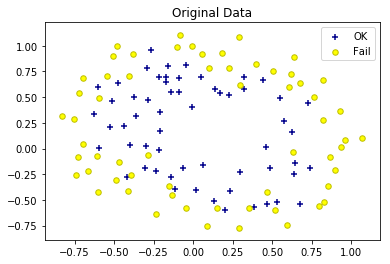

In [60]:
plotData(X, Y, 'OK', 'Fail')

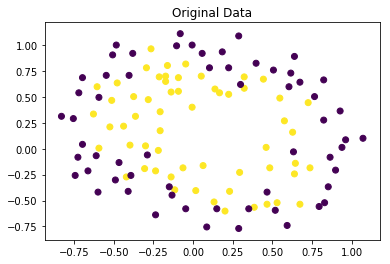

In [59]:
#The easiest way

x,y,c = np.loadtxt('microchips.csv',delimiter=',', unpack=True)
plt.scatter(x,y,c=c)
plt.title('Original Data')
plt.show()

# Exe1.Question2. Implement k_NN Classification

In [61]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2,axis=0))  

In [62]:
x_test = np.array([[-0.3, 1.0],[-0.5, -0.1],[0.6, 0.0]])
x_train = data[:,0:2]
x_label = data[:,2].astype(int)

In [63]:
def knn(xtr,xte,lb,k=1,print_=0):
    
    distance_list = [[euclidean_distance(train_i,test_i) for train_i in xtr] for test_i in  xte]
    distance_list = np.array(distance_list)
       
    sorted_distance_list = np.sort(distance_list, axis=1)
    sorted_index = np.argsort(distance_list, axis=1)
   
    k_nearest_poins = np.take(xtr,sorted_index[:,0:k],axis=0)
    
    k_nearest_label = np.take(lb,sorted_index[:,0:k],axis=0)
        
    distance_k_nearest_points = [sorted_distance_list[:,0:k] ]
    
    predicted = []
    
    for p in k_nearest_label:
        predicted.append(np.bincount(p).argmax())

    predicted = np.array(predicted)
    
    if print_==1:
    
        print("k = {} ".format(k))
        f= lambda x: 'Fail' if x==0 else 'OK'
        for i , point in enumerate(zip(predicted,xte)):
            print('\t', 'chip{}: '.format(i+1), point[1],"==>", f(point[0]))
    
    else:
        return predicted

In [64]:
knn(x_train,x_test,x_label,k=1,print_=1)

k = 1 
	 chip1:  [-0.3  1. ] ==> OK
	 chip2:  [-0.5 -0.1] ==> Fail
	 chip3:  [0.6 0. ] ==> Fail


In [22]:
knn(x_train,x_test,x_label,k=3,print_=1)

k = 3 
	 chip1:  [-0.3  1. ] ==> Fail
	 chip2:  [-0.5 -0.1] ==> Fail
	 chip3:  [0.6 0. ] ==> OK


In [23]:
knn(x_train,x_test,x_label,k=5,print_=1)

k = 5 
	 chip1:  [-0.3  1. ] ==> Fail
	 chip2:  [-0.5 -0.1] ==> OK
	 chip3:  [0.6 0. ] ==> OK


In [24]:
knn(x_train,x_test,x_label,k=7,print_=1)

k = 7 
	 chip1:  [-0.3  1. ] ==> Fail
	 chip2:  [-0.5 -0.1] ==> Fail
	 chip3:  [0.6 0. ] ==> OK


# Exe1.Question3. Plot decision boundary

In [65]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02  # step size in the mesh

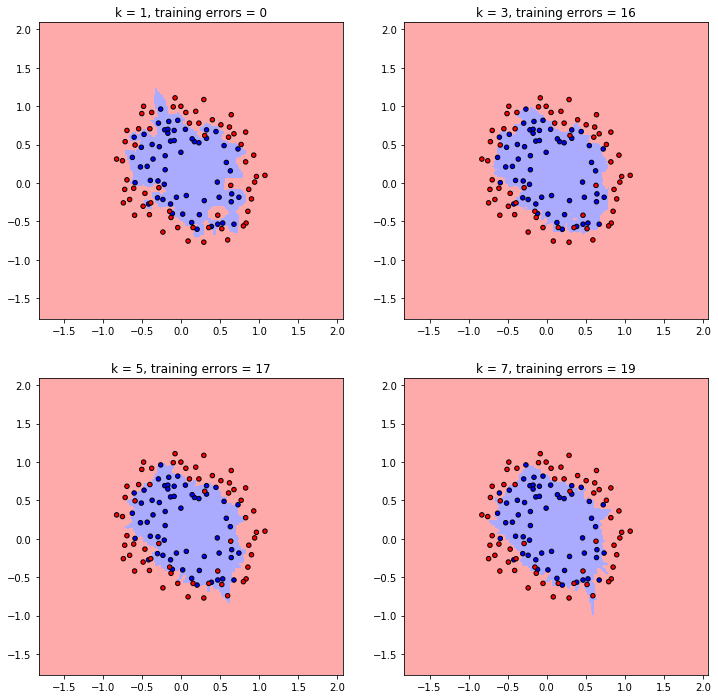

In [42]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

plt.figure(figsize=(12, 12))

for i,neib in enumerate([1,3,5,7],start=1):

    Z = knn(x_train,np.c_[xx.ravel(), yy.ravel()],x_label,k=neib)

    #calculate error
    predicted = knn(x_train,x_train,x_label,k=neib)
    error = ((predicted == x_label)== False).sum()

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
          
    plt.subplot(220+i)      
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=x_label, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("k = %i, training errors = %i" % (neib, error))

plt.show()